In [1]:
import json
import pickle

import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
from scipy.signal import resample
import matplotlib.pyplot as plt
from tqdm import tqdm

# import dataholders as dh
import tools.utils as utils
import tools.points_processing as pp

In [2]:
with open('data/data16.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
time, lowT, upT, lwc = data['time_av'], data['lowT_av'], data['upT_av'], data['lwc1V_av']

In [4]:
time_actos, sonic1, sonic2, sonic3 = data['time'], data['sonic1'], data['sonic2'], data['sonic3']

In [5]:
time, [lowT, upT, lwc] = utils.fast_synchronize(time, lowT, upT, lwc)

In [6]:
df = pd.DataFrame(data={'sonic1': sonic1, 'sonic2': sonic2, 'sonic3': sonic3}, index=time_actos)

df.index.name = 'time'

df = df.reset_index()

df = df.set_index(pd.TimedeltaIndex(df.time, unit='ms'))

df = df.resample(rule='10L').mean()

df['time'] = df.index.astype(int) // 1000000

df = df.set_index('time')

In [7]:
df_uft = pd.DataFrame(data={'lowT': lowT, 'upT': upT, 'lwc': lwc}, index=time)
df_uft.index.name = 'time'

In [9]:
df_uft.head()

,lowT,lwc,upT
time,,,
32370,24.309617,0.0,24.278742
32380,24.137642,0.0,24.162896
32390,24.159918,0.0,24.204637
32400,24.195410,0.0,24.216821
32410,24.009834,0.0,23.998107


In [10]:
df.head()

,sonic1,sonic2,sonic3
time,,,
10,-2.547950,-0.728732,-0.057512
20,-2.480766,-0.737703,-0.035383
30,-2.468596,-0.683246,0.018860
40,-2.476595,-0.622767,0.054043
50,-2.484139,-0.568852,0.061148


In [14]:
df_full = pd.merge(df_uft, df, left_index=True, right_index=True)

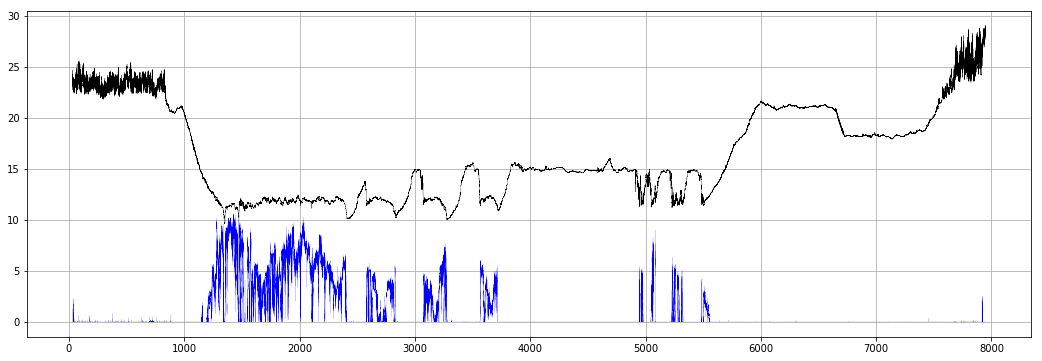

In [34]:
plt.rcParams['figure.figsize'] = [18, 6]

plt.plot(time//1000, lowT, lw=.3, c='black')

plt.plot(time//1000, lwc*10, lw=.1, c='b')

plt.grid()


plt.show()

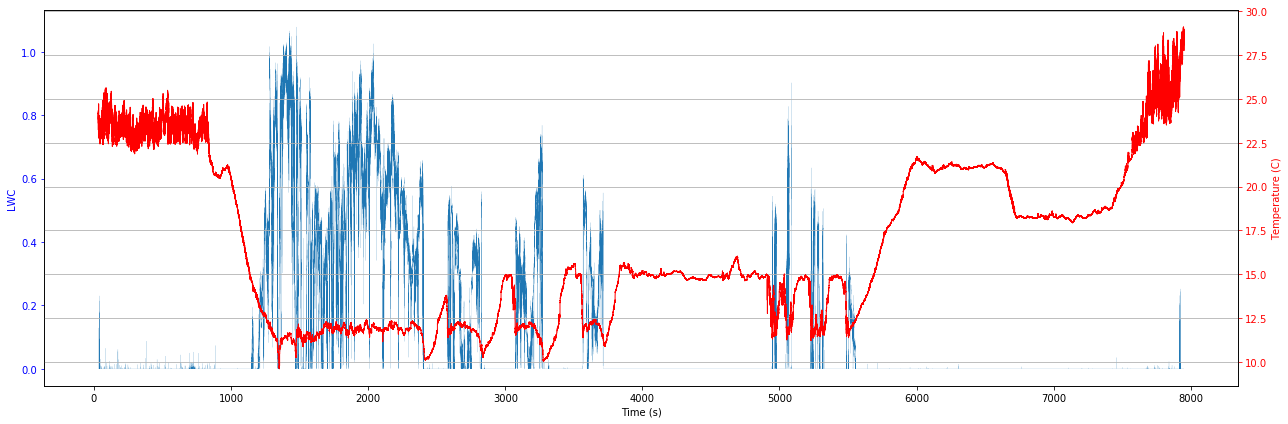

In [49]:
fig, ax1 = plt.subplots()


ax1.plot(time//1000, lwc, lw=.1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('LWC', color='b')
ax1.tick_params('y', colors='b')


ax2 = ax1.twinx()

ax2.plot(time//1000, lowT, c='r', lw=1)

ax2.set_ylabel('Temperature (C)', color='r')
ax2.tick_params('y', colors='r')

# ax1.grid()
ax2.grid()

fig.tight_layout()
plt.show()